<a href="https://colab.research.google.com/github/samiha-mahin/Data-Analysis/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Scaling**

Feature scaling means  making all numerical features (columns) use the same scale.

Some features may have big values (e.g., salary = 50,000) and some small (e.g., age = 25).
If you don’t scale them, models may give more importance to bigger numbers,
even when they shouldn’t.

| Method               | What it does                                      |
| -------------------- | ------------------------------------------------- |
| **Min-Max Scaling**  | Puts values between 0 and 1                       |
| **Standard Scaling** | Makes data have mean 0, std 1 (like a bell curve) |


Example:

| Age | Salary |
| --- | ------ |
| 25  | 50,000 |
| 35  | 80,000 |

After Min-Max Scaling:

| Age | Salary |
| --- | ------ |
| 0.0 | 0.0    |
| 1.0 | 1.0    |

Now both are on the same scale.


# **1.Standardization**

**Standardization means:**

Rescaling data so that it has:

Mean = 0

Standard Deviation = 1

**Why do we use it?**

To make all features (columns) have the same scale, especially useful when:

Data has different units (e.g., age vs income)

You're using ML models that are sensitive to scale (like SVM, KNN, logistic regression)

**Algorithms that need standardization**

| Algorithm                              | Why?                              |
| -------------------------------------- | --------------------------------- |
| **K-Nearest Neighbors (KNN)**          | Uses distance between points      |
| **Support Vector Machine (SVM)**       | Sensitive to feature scale        |
| **Logistic Regression**                | Uses gradient-based optimization  |
| **Linear Regression**                  | Improves convergence and fairness |
| **Principal Component Analysis (PCA)** | Based on variance and distance    |
| **Neural Networks (e.g., MLP)**        | Faster and better training        |
| **K-Means Clustering**                 | Uses Euclidean distance           |
| **Gardient Descent**                   | Theta calculation becomes faster  |


**Algorithms that don’t require standardization:**


| Algorithm         | Reason                                |
| ----------------- | ------------------------------------- |
| **Decision Tree** | Not based on distance or gradient     |
| **Random Forest** | Ensemble of trees (scale-independent) |
| **XGBoost**       | Tree-based boosting                   |

**Standardization does not handle outliers well.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
df = df.iloc[:, 2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
378,41,87000,1
262,55,125000,1
243,56,104000,1
165,18,86000,0
394,39,59000,0


**Now you're training your model to predict whether a person will purchase or not — based on their Age and EstimatedSalary.**

**Train test split**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_test , y_train = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape


((280, 2), (120, 2))

**StandardScaler**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [13]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

After scaling , your data becomes a NumPy array.

You are converting it back to a DataFrame so it looks nice and has column names again.

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)


In [16]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**Effect of Scaling**

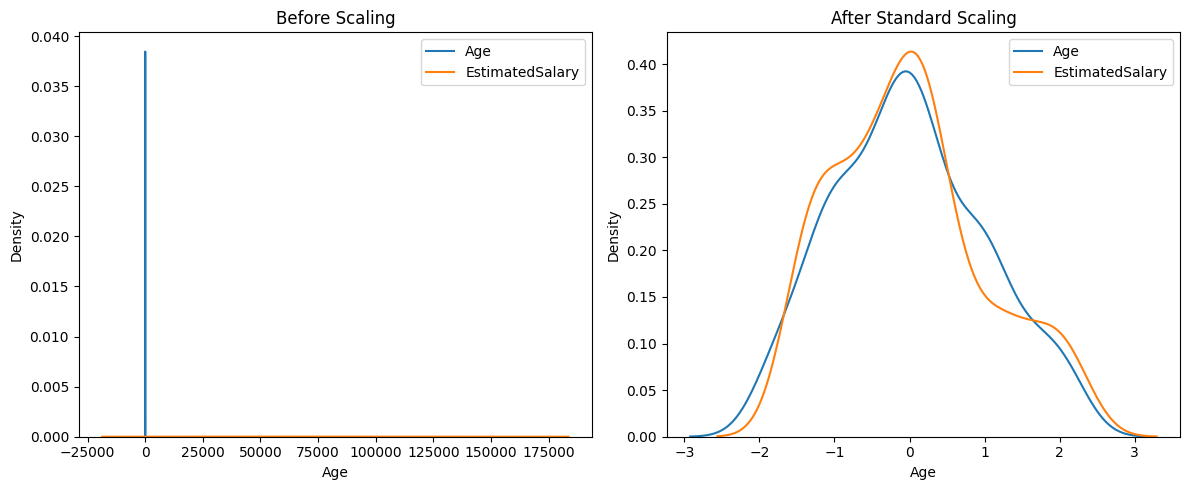

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')
ax1.legend()


# After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')
ax2.legend()

plt.tight_layout()
plt.show()

Comparison of Distributions

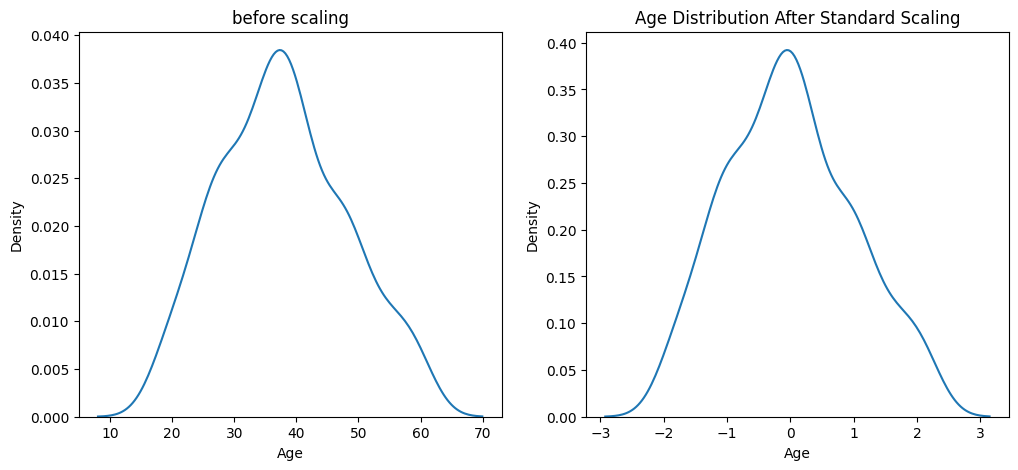

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

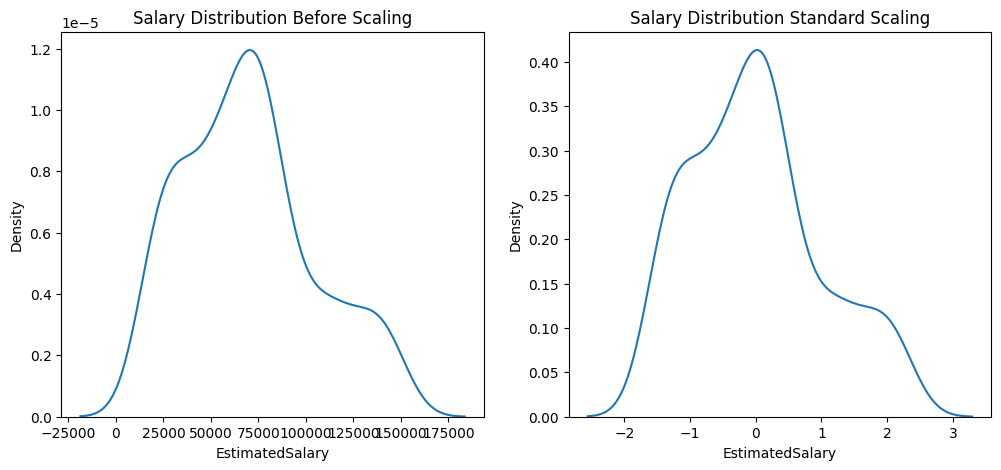

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

The graphs showing that distrtributions remained same after scaling.

**Importance of Scaling**

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [40]:
lr.fit(x_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [41]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score

In [45]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
